In [1]:
import ursse.sync_motion_simulation as sms
import pandas as pd
import os 
import numpy as np
from ursse.path_assistant import PathAssistant, shifts_folder
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import pickle
import valstore as vt
from config_ursse import get_from_config
images_dir = os.path.join(get_from_config("URSSE_sync_motion_note_dir"),
                          "images")
from ursse.utils import normalize, myhist

In [2]:
rf_noise_std_list = 1e-5*np.arange(16)
str_label_list = [f'{x:.1e}' for x in rf_noise_std_list]
spad_tts_list = [0.350, 0.400, 0.450]
spad_tts_dist_list = ['Gamma', 'Gaussian']
tot_n = len(str_label_list) * len(spad_tts_list) * len(spad_tts_dist_list)
with open(os.path.join(shifts_folder, "all_data_sim_cache", "all_results.pkl"), 'rb') as f:
    all_results = pickle.load(f)

In [3]:
best_rf_label = "6.0e-05"
vt.newval("BestRfStd", float(best_rf_label), "{:.1e}", "rad",
          "analyzing_collected_data/all_single_electron_data/plots_for_JINST.ipynb")

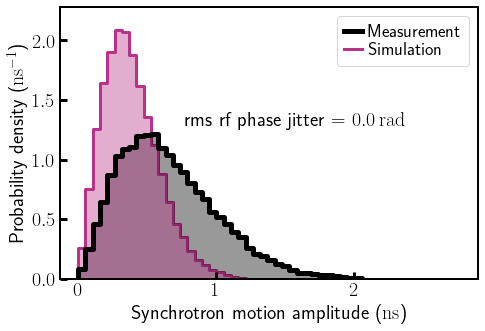

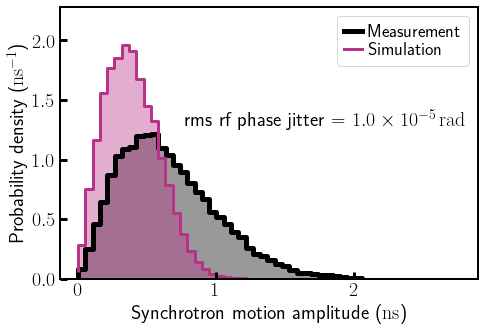

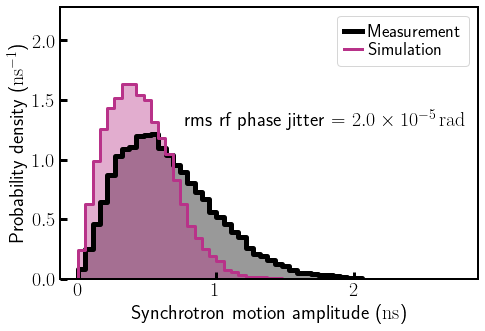

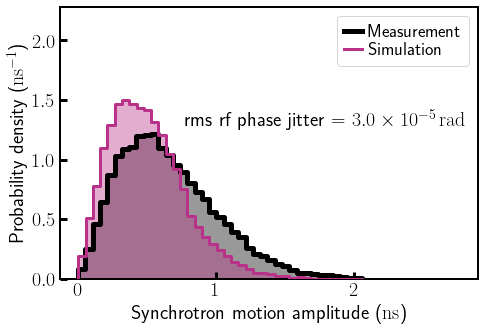

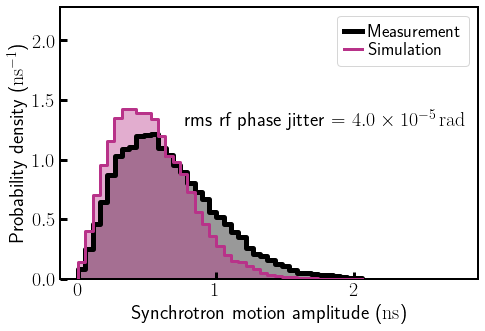

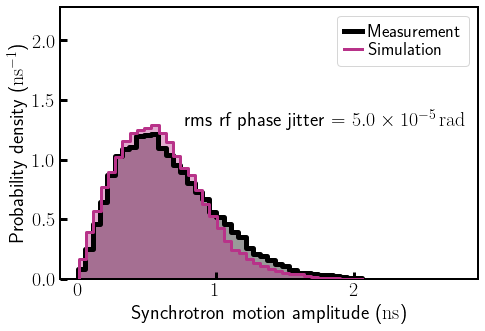

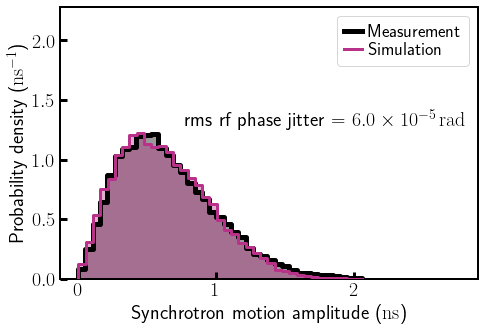

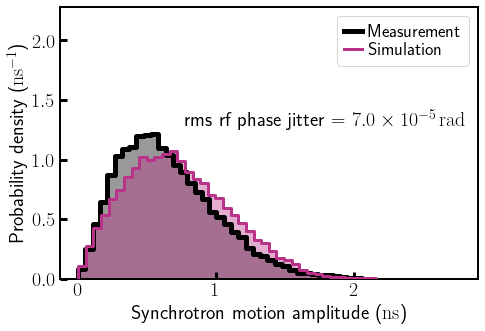

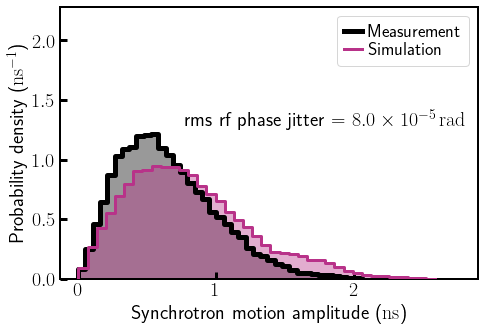

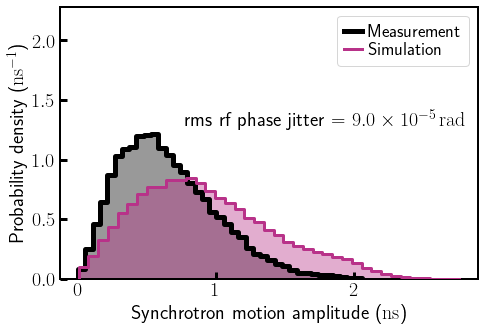

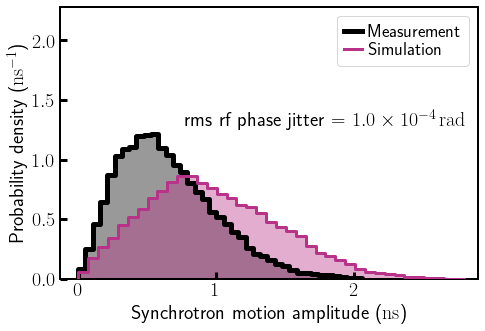

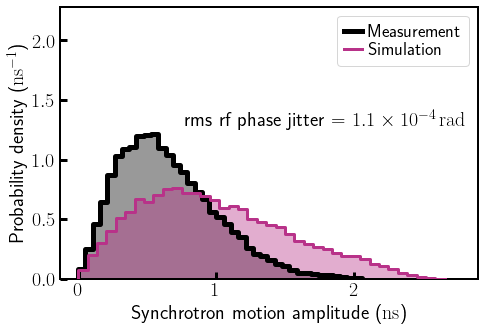

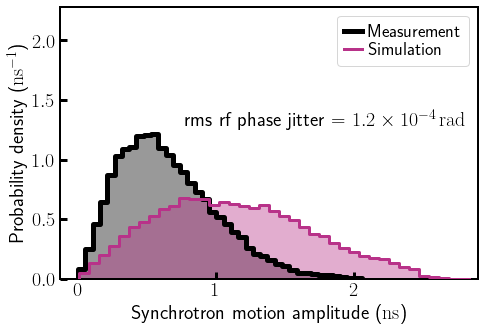

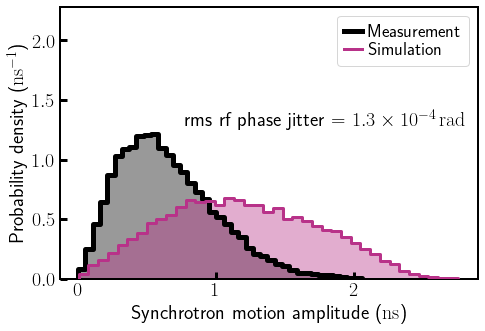

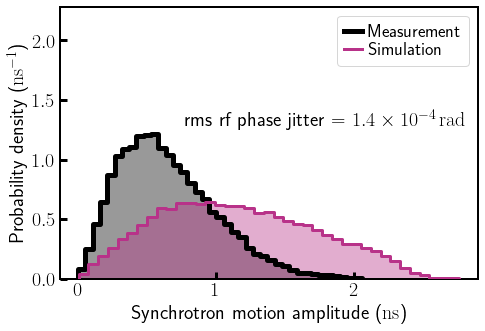

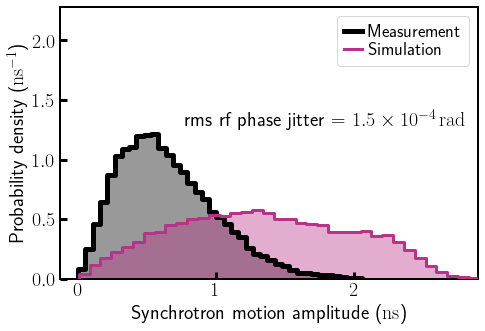

In [4]:
from ursse.path_assistant import get_plot_style_sheet
plt.style.use(get_plot_style_sheet("jinst"))


plt.rc('text.latex', preamble=
       r'\usepackage{siunitx}')

fit_tts = 0.4
rf_proj = [r for r in all_results if (r['spad_tts'] == fit_tts) and (r['spad_tts_dist'] == 'Gamma')]

colormap = cm.get_cmap("plasma")
cols = [colormap(i/14) for i in [2,6,9]]
alpha = 0.4
subtitlepos = 0.3, 0.55


for i, res in enumerate(rf_proj):
    rf_noise_std = res['rf_noise_std']
    rf_noise_label = res['rf_std_label']
    data = res['data']

    fig, ax0 = plt.subplots(figsize=(7.5,5))
    # ax0, ax1 = axs

    if i == 0:
        x0 = data['amplitude']['bin_centers']
        y0 = normalize(data['amplitude']['aggregated_hists']['meas'])/(x0[1]-x0[0])
    myhist(ax0, x0, y0, label="Measurement",
                linewidth=5, color="black", zorder=1)
    
    x = data['amplitude']['bin_centers']
    y = normalize(data['amplitude']['aggregated_hists']['sim'])/(x[1]-x[0])
    col = cols[1]
    myhist(ax0, x, y, label=f"Simulation",
           color=col, zorder=i,
           linewidth=3)
    ax0.set_ylabel(r"Probability density (\SI{}{ns^{-1}})")
    ax0.set_xlabel(r"Synchrotron motion amplitude (\SI{}{ns})")

    ax0.set_xlim(-0.1330853593399852, 2.898454777885735)
    ax0.set_ylim(0.0, 2.2812212701672323)

    ax0.text(*subtitlepos, r"rms rf phase jitter = \SI{"+f"{rf_noise_label}"+r"}{rad}",
             transform=ax0.transAxes,
             va='bottom', ha='left')

    ax0.legend()
    
    fig.savefig(f"{i}.png",
            dpi=300, bbox_inches='tight')
    
    plt.show()

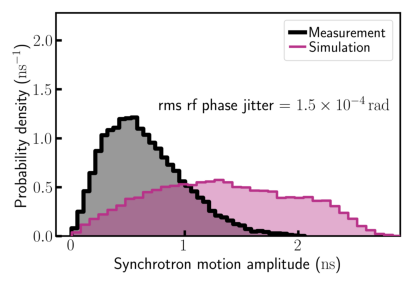

In [5]:
import matplotlib.image as mgimg
from matplotlib import animation, rc
from IPython.display import HTML, Image
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

fig = plt.figure(figsize=(7.5,5))

# initiate an empty  list of "plotted" images 
myimages = []

#loops through available png:s
for p in range(len(rf_proj)):

    ## Read in picture
    fname = f"{p}.png" 
    img = mgimg.imread(fname)
    plt.axis('off')
    imgplot = plt.imshow(img)

    # append AxesImage object to the list
    myimages.append([imgplot])

## create an instance of animation
my_anim = animation.ArtistAnimation(fig, myimages, interval=500, blit=True, repeat_delay=500)

## NB: The 'save' method here belongs to the object you created above
my_anim.save("various_rf_jitters.gif", writer='imagemagick', fps=2, dpi=300)

# ## Showtime!
plt.show()

In [6]:
my_anim

In [7]:
import os
process = os.popen('rm *.png')
preprocessed = process.read()
process.close()
preprocessed

''